<a href="https://colab.research.google.com/github/ThaoLai19/BWH2-Particle-Systems/blob/main/Processing%20DSA/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diplib
import diplib as dip
import cv2
import numpy as np
import json
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load image and convert to binary
skeletonImage = plt.imread('a.jpg')
binaryImage = invert(rgb2gray(skeletonImage)) > 0.5

In [ ]:
# Increase the size of the binary image
binaryImage_large = resize(binaryImage, (binaryImage.shape[0]*2, binaryImage.shape[1]*2))

In [ ]:
# Generate the distance field
distanceField_large = distance_transform_edt(binaryImage_large)
distanceField = resize(distanceField_large, binaryImage.shape)

In [ ]:
# Normalize distance field to range [0,1]
distanceField /= distanceField.max()

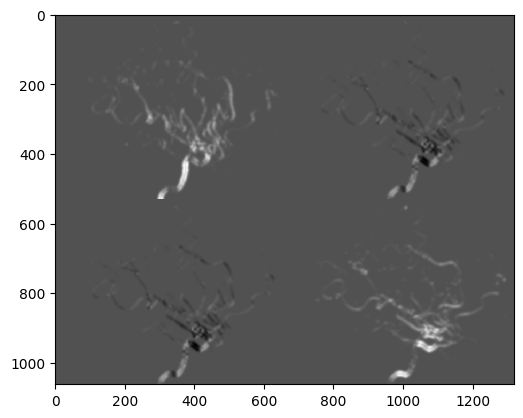

In [ ]:
# This calculation of the Structure Tensor is based on the process shown here:
# https://www.crisluengo.net/archives/1132/

# create an image usable by the PyDIP library
img = dip.Image(distanceField)
# compute the gradient of the image
g = dip.Gradient(img)
# multiply the image by its own transpose
S = g @ dip.Transpose(g)
S = dip.Gauss(S, 3)
dip.TileTensorElements(S).Show()

# calculate the Structure Tensor of the image
S = dip.StructureTensor(img, tensorSigmas=3)
# Calculate the normal vectors for each pixel in the image
normals = dip.LargestEigenvector(S)
     

In [ ]:
# read image to get its dimensions
img2 = cv2.imread('a.jpg', cv2.IMREAD_UNCHANGED)
 
# get the height and width of the image
height = img2.shape[0]
width = img2.shape[1]

# a is a 3D array that stores the normal vector for each pixel in the image
a = np.empty([height,width,2])
index = 0
for y in range(width):
  for x in range(height):
    #print(normals[index])
    a[x][y][0] = normals[index][0]
    a[x][y][1] = normals[index][1]
    #print(arr[x][y])
    index += 1

In [ ]:
# convert a into a list for exporting it into a JSON file
aData = a.tolist()
# export the list of normal vectors as a JSON file
with open('gradient.json', 'w') as f:
    json.dump(aData, f)

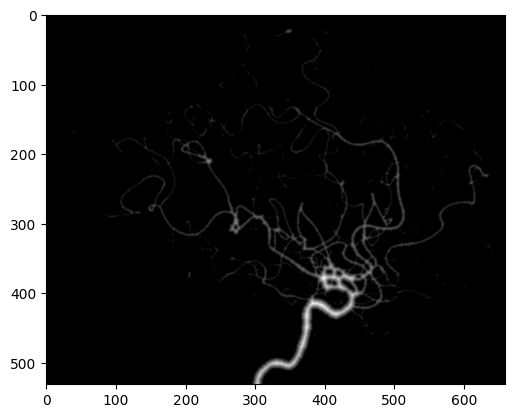

In [ ]:
# Display the distance field
plt.imshow(distanceField, cmap='gray')
plt.show()

# Save the distance field as a JSON file
distanceFieldData = distanceField.tolist()
with open('distance_field.json', 'w') as f:
    json.dump(distanceFieldData, f)

# Save the distance field as PNG
plt.imsave('distance_field.png', distanceField, cmap='gray')